#  Анализ интернет-магазина компьютерных игр «Стримчик»
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

  - Описание данных
     - Name — название игры
     - Platform — платформа
     - Year_of_Release — год выпуска
     - Genre — жанр игры
     - NA_sales — продажи в Северной Америке (миллионы проданных копий)
     - EU_sales — продажи в Европе (миллионы проданных копий)
     - JP_sales — продажи в Японии (миллионы проданных копий)
     - Other_sales — продажи в других странах (миллионы проданных копий)
     - Critic_Score — оценка критиков (максимум 100)
     - User_Score — оценка пользователей (максимум 10)
     - Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

##### Общая информация

In [2]:
data = pd.read_csv('games.csv')
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


##### Подготовка данных

Заменим названия столбцов:

In [3]:
data = data.rename(columns={
    'Name':'name',
    'Platform': 'platform',
    'Year_of_Release': 'year_of_release',
    'Genre': 'genre',
    'NA_sales': 'na_sales',
    'EU_sales': 'eu_sales',
    'JP_sales': 'jp_sales',
    'Other_sales': 'other_sales',
    'Critic_Score': 'critic_score',
    'User_Score': 'user_score',
    'Rating': 'rating'
})
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Посмотрим на типы данных:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data['year_of_release'] = data['year_of_release'].astype('int', errors='ignore')
data['critic_score'] = data['critic_score'].astype('int', errors='ignore')


Заменили столбцы год релиза и оценка критиков на int. user_score на float.

В name, genre, year_of_release удалим пропуски, их не так много. Crititc_score и user_score оставим как есть, т.к. в них большая часть пропусков.

In [6]:
data = data.dropna(subset=['name','year_of_release'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


TBD — это аббревиатура, которая обозначает «To Be Determined» (англ. «будет определено»). Это выражение используется в различных областях и означает, что некоторые детали еще не известны или не определены.

In [7]:
data['user_score'].value_counts(dropna=False)

NaN    6605
tbd    2376
7.8     322
8       285
8.2     276
       ... 
1.9       2
9.6       2
0.9       2
0         1
9.7       1
Name: user_score, Length: 97, dtype: int64

Значения tbd можно заменить на None, т.к. смысловой нагрузки они не несут.

In [8]:
def change_tbd(data):
    data['user_score'].loc[data['user_score'] == 'tbd'] = None
change_tbd(data)
data['user_score'].value_counts(dropna=False)
data['user_score'] = data['user_score'].astype('float')

C:\Users\Владислав\AppData\Local\Temp\ipykernel_28972\1650899317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['user_score'].loc[data['user_score'] == 'tbd'] = None
C:\Users\Владислав\AppData\Local\Temp\ipykernel_28972\1650899317.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['user_score'] = data['user_score'].astype('float')


In [9]:
data['rating'].value_counts(dropna = False)

NaN     6676
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

In [10]:
data['rating'] = data['rating'].fillna('unknown')
data['rating'].value_counts(dropna = False)

C:\Users\Владислав\AppData\Local\Temp\ipykernel_28972\3828904670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rating'] = data['rating'].fillna('unknown')


unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
AO            1
RP            1
Name: rating, dtype: int64

В столбце Rating много пропусков и они не случайны, скорее всего эти игры не получили оценок, поскольку могли быть выпущены до того как появилась система ESRB или в этом регионе необязательно, чтобы играм был присвоен рейтинг системой ESRB, может таких игр больше всего в каком-то определенном регионе или просто еще не успели их оценить. Их стоит заменить особым значением, например "unknown", чтобы при составлении портрета пользователя не потерять эти данные.

In [11]:
data['sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

C:\Users\Владислав\AppData\Local\Temp\ipykernel_28972\206105484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)


In [12]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


Заменили пропуски в местах, где это имееть место быть. Заменили типы данных на корректные. Добавили столбец sales.

##### Исследовательский анализ данных

###### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

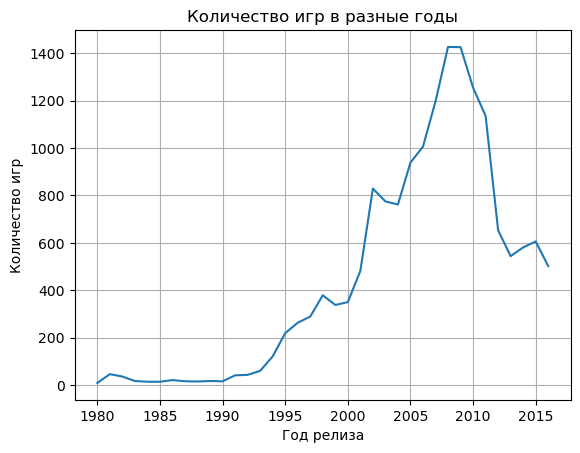

In [13]:
data.groupby('year_of_release')['name'].count().plot(title = 'Количество игр в разные годы',
                                                     xlabel = 'Год релиза',
                                                     ylabel = 'Количество игр',
                                                     grid = True);

In [14]:
data.groupby('year_of_release')['name'].count().sort_values(ascending=True)

year_of_release
1980.0       9
1984.0      14
1985.0      14
1988.0      15
1990.0      16
1987.0      16
1989.0      17
1983.0      17
1986.0      21
1982.0      36
1991.0      41
1992.0      43
1981.0      46
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1999.0     338
2000.0     350
1998.0     379
2001.0     482
2016.0     502
2013.0     544
2014.0     581
2015.0     606
2012.0     653
2004.0     762
2003.0     775
2002.0     829
2005.0     939
2006.0    1006
2011.0    1136
2007.0    1197
2010.0    1255
2009.0    1426
2008.0    1427
Name: name, dtype: int64

Пик выпуска игра приходится на 2007-2008 год. До 1993 года выпускалось < 60 игр ежегодно. Слишком мало данных для анализа.

###### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [15]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [16]:
data_platforms = data.groupby('platform')['sales'].sum().sort_values(ascending=False).head(5)
list = []
for i, j in data_platforms.items():
    list.append(i)
list

['PS2', 'X360', 'PS3', 'Wii', 'DS']

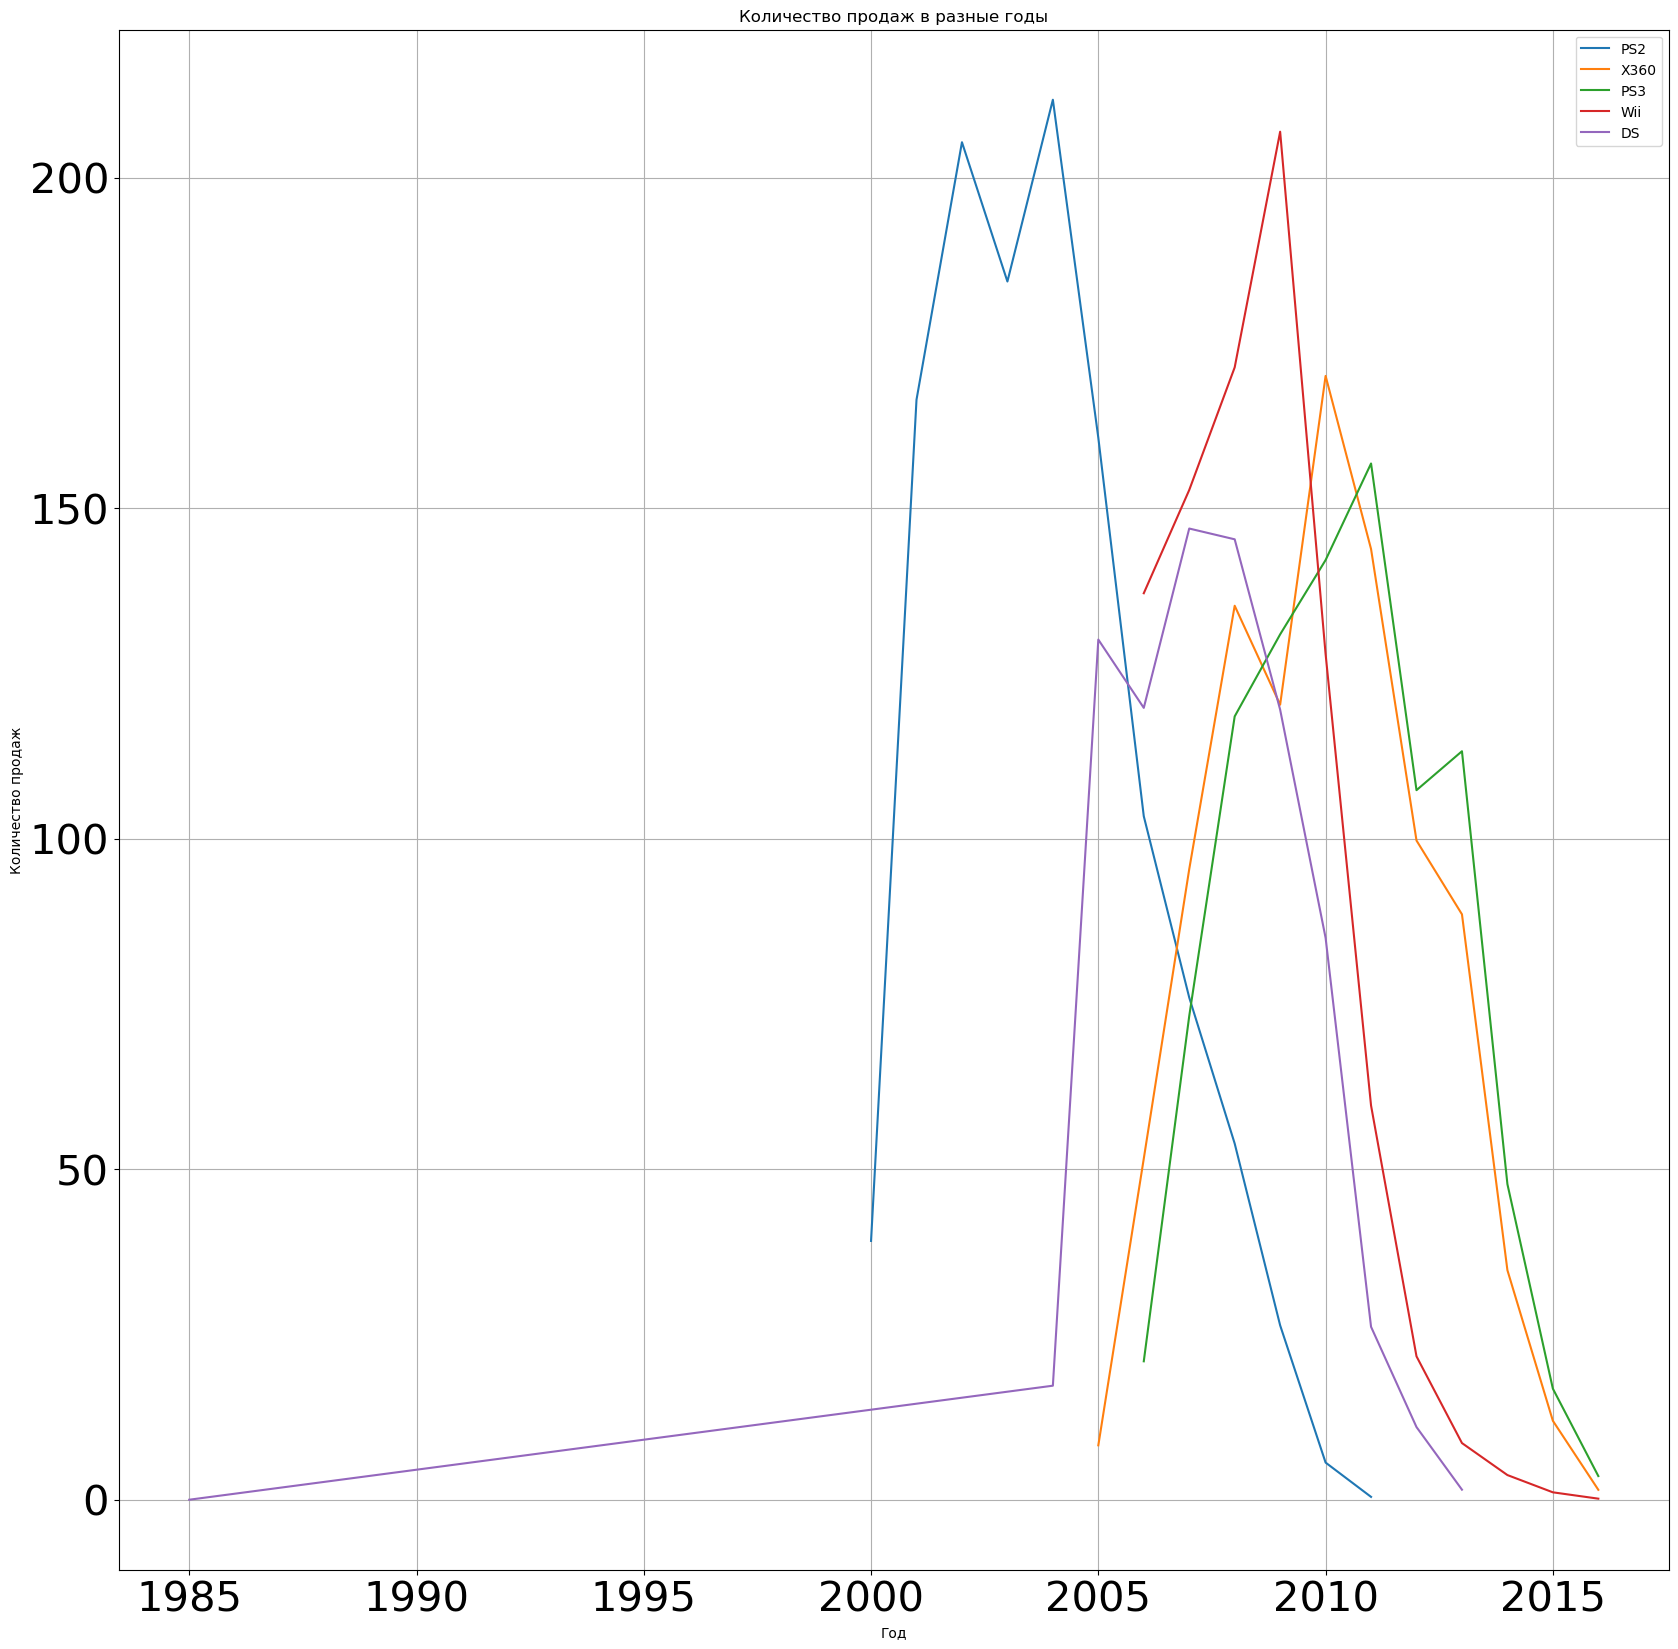

In [17]:
for x in list:
    data_extra = data[data['platform'] == x]
    data_extra = data_extra.rename(columns = {'sales': f'{x}'})
    (
    data_extra.groupby('year_of_release')[f'{x}']
            .sum()
            .plot(title = 'Количество продаж в разные годы',
                  xlabel = 'Год',
                  ylabel = 'Количество продаж',
                  grid = True,
                  figsize = (20, 20),
                  legend = f'{x}',
                  fontsize = 30)
    );

В среднем плафторма держится на рынке 10 лет.

###### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Необходимо захватить те платформы, которые сейчас находятся на этапе роста или зрелости, именно они и будут актуальны в 2017 году. Период следует взять 3-4 года.

In [18]:
good_data = data.query('year_of_release > 2012')


###### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

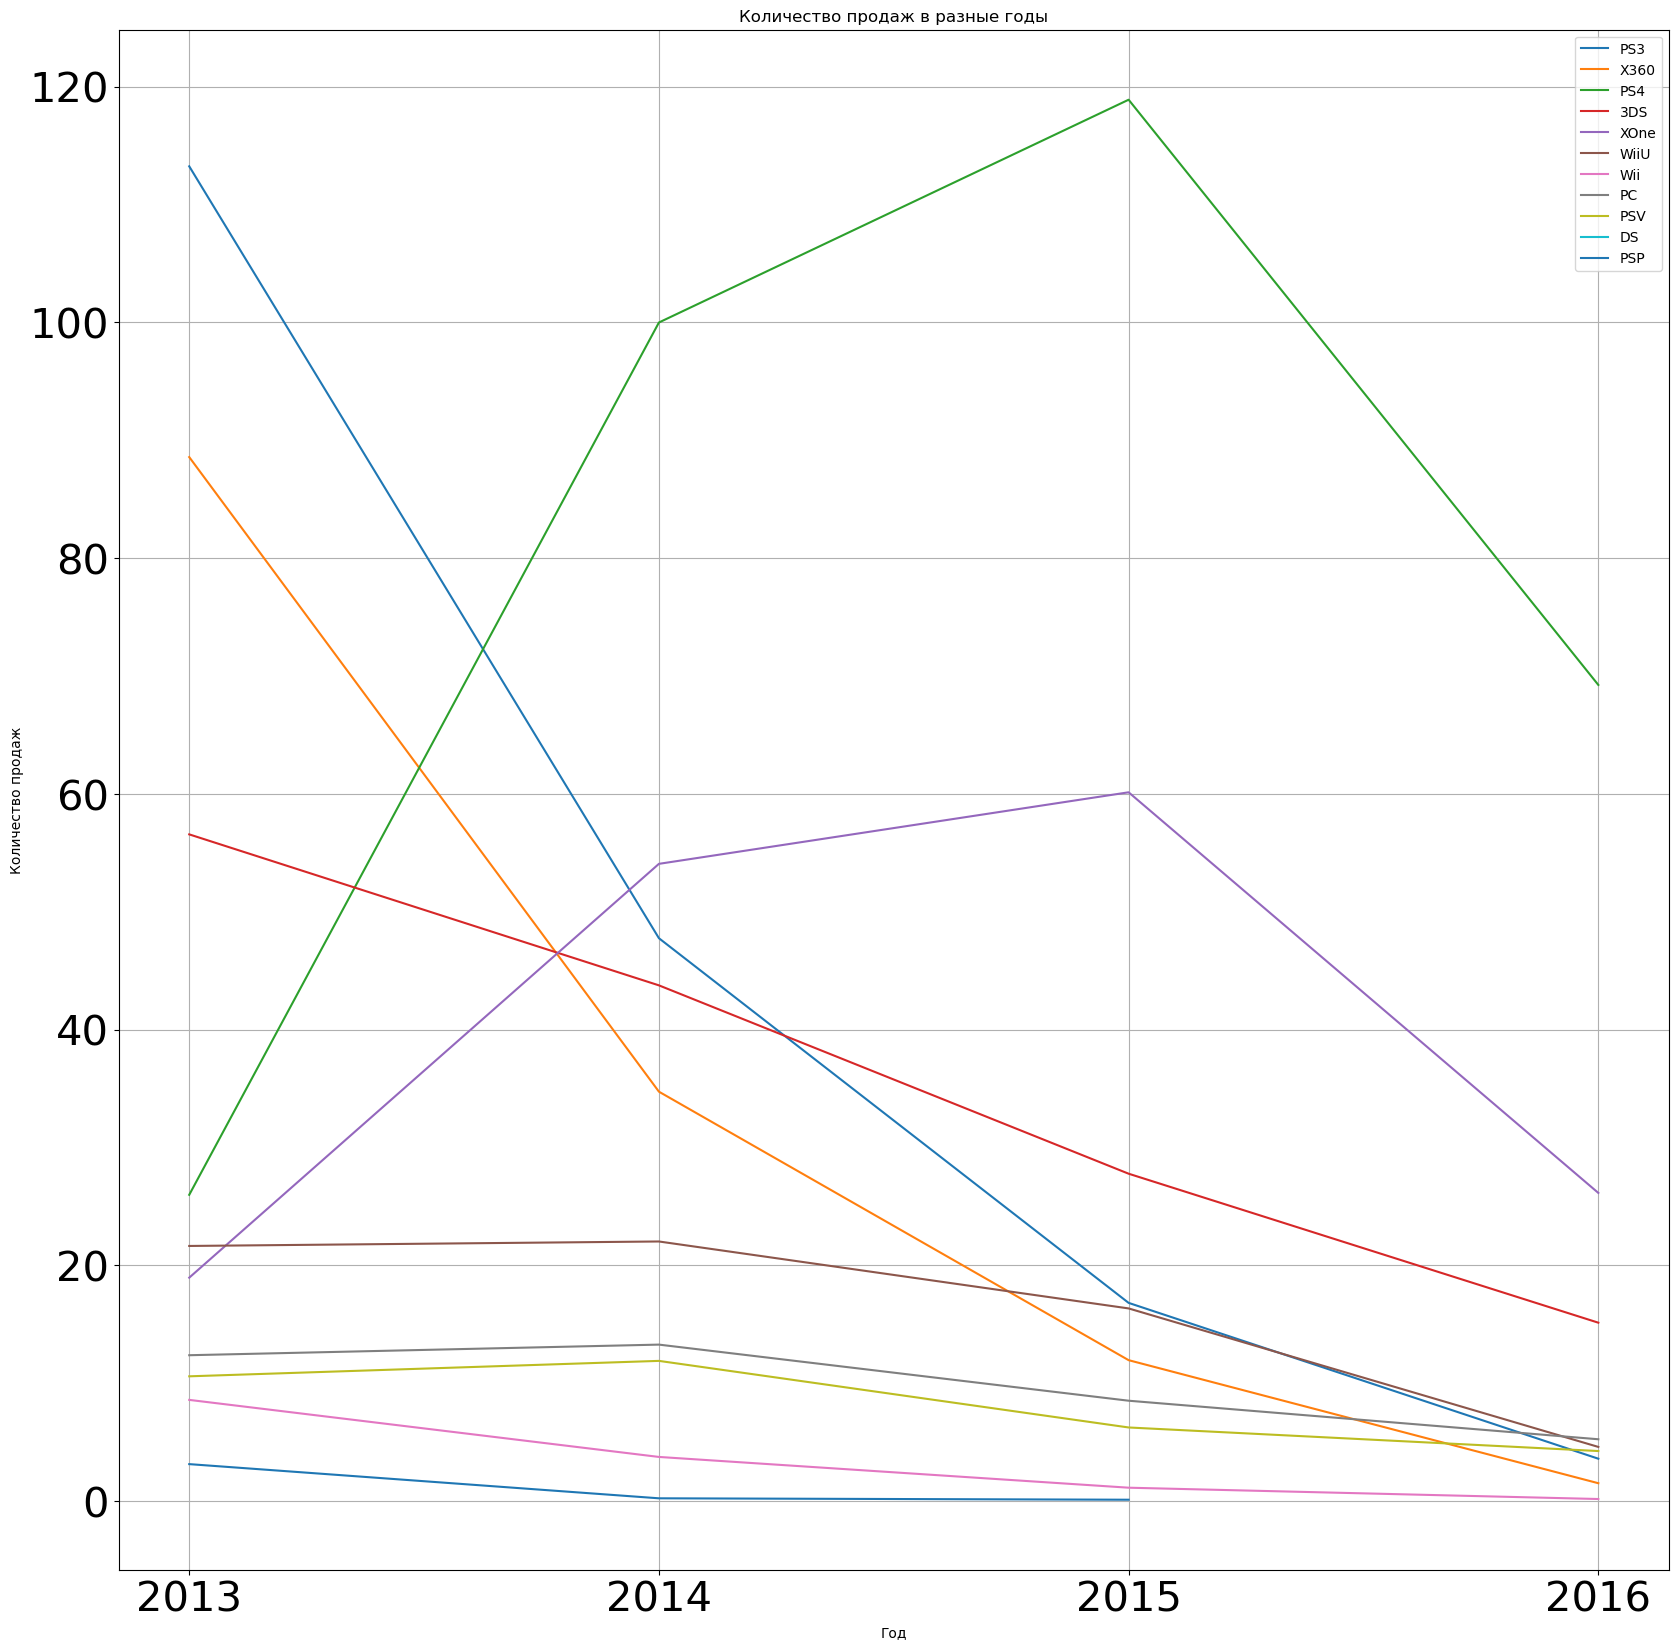

In [19]:
for x in good_data['platform'].unique():
    extra_data = good_data[good_data['platform'] == x]
    extra_data = extra_data.rename(columns = {'sales': f'{x}'})
    (
    extra_data
              .groupby('year_of_release')[f'{x}']
              .sum()
              .plot( title = 'Количество продаж в разные годы',
                     xlabel = 'Год',
                     ylabel = 'Количество продаж',
                     grid = True,
                     figsize = (20, 20),
                     legend = 1,
                     fontsize = 30,
                     xticks = [2013, 2014, 2015, 2016])
    )

Лидеры продаж - PS4, XOne, 3DS, однако, у первых двух прибыль с 2013 растёт. У 3DS с 2011 года прибыль падает.

###### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

Возьмем лидеров продаж: PS4, XOne, 3DS.

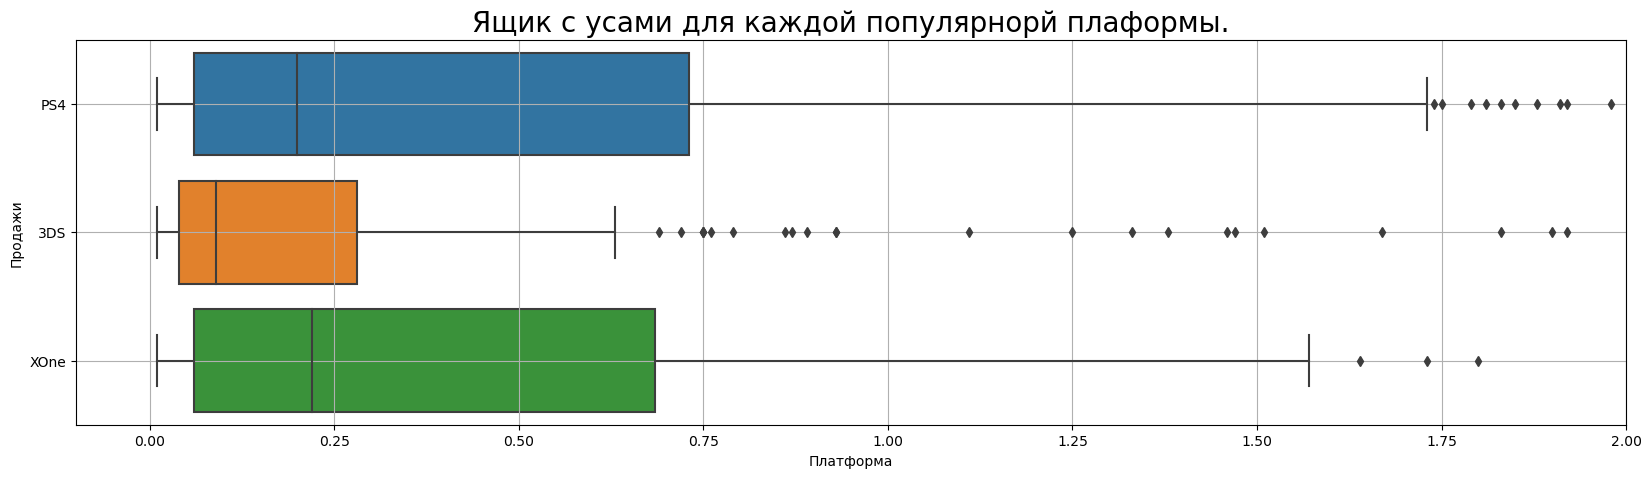

In [20]:
platforms = ['PS4', 'XOne','3DS']
df_platforms = good_data[good_data['platform'].isin(platforms)]

plt.figure(figsize=(20, 5))
plt.xlim(-0.1, 2)
plt.title('Ящик с усами для каждой популярнорй плаформы.', fontsize=20)
sns.boxplot(x='sales', y='platform', data=df_platforms, orient='h')
plt.ylabel('Продажи')
plt.xlabel('Платформа')
plt.grid(True);

Есть множество выбросов. Медиана у лидеров находится дальше остальных. Разброс больше, так как значений продаж больше, средняя/медианная прибыль больше. Размах усов для ящиков ограничен минимуом и максимумом, и он шире чем у двух других консолей. Это значит, что в диапазон попадает большое количество значений(нормальных). Обьянятется тем, что платформы имеют большое число продаж. Выбросы и аномалии находятся за приделами усов.

###### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.

Возьмем самую популярную платформу на 2016 год - PS4.

In [21]:
data_ps4 = good_data[good_data['platform'] == 'PS4']
data_ps4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016.0,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,unknown,0.01
16503,Shin Hayarigami 2,PS4,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16526,Dungeons 2,PS4,2016.0,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16530,Carmageddon: Max Damage,PS4,2016.0,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


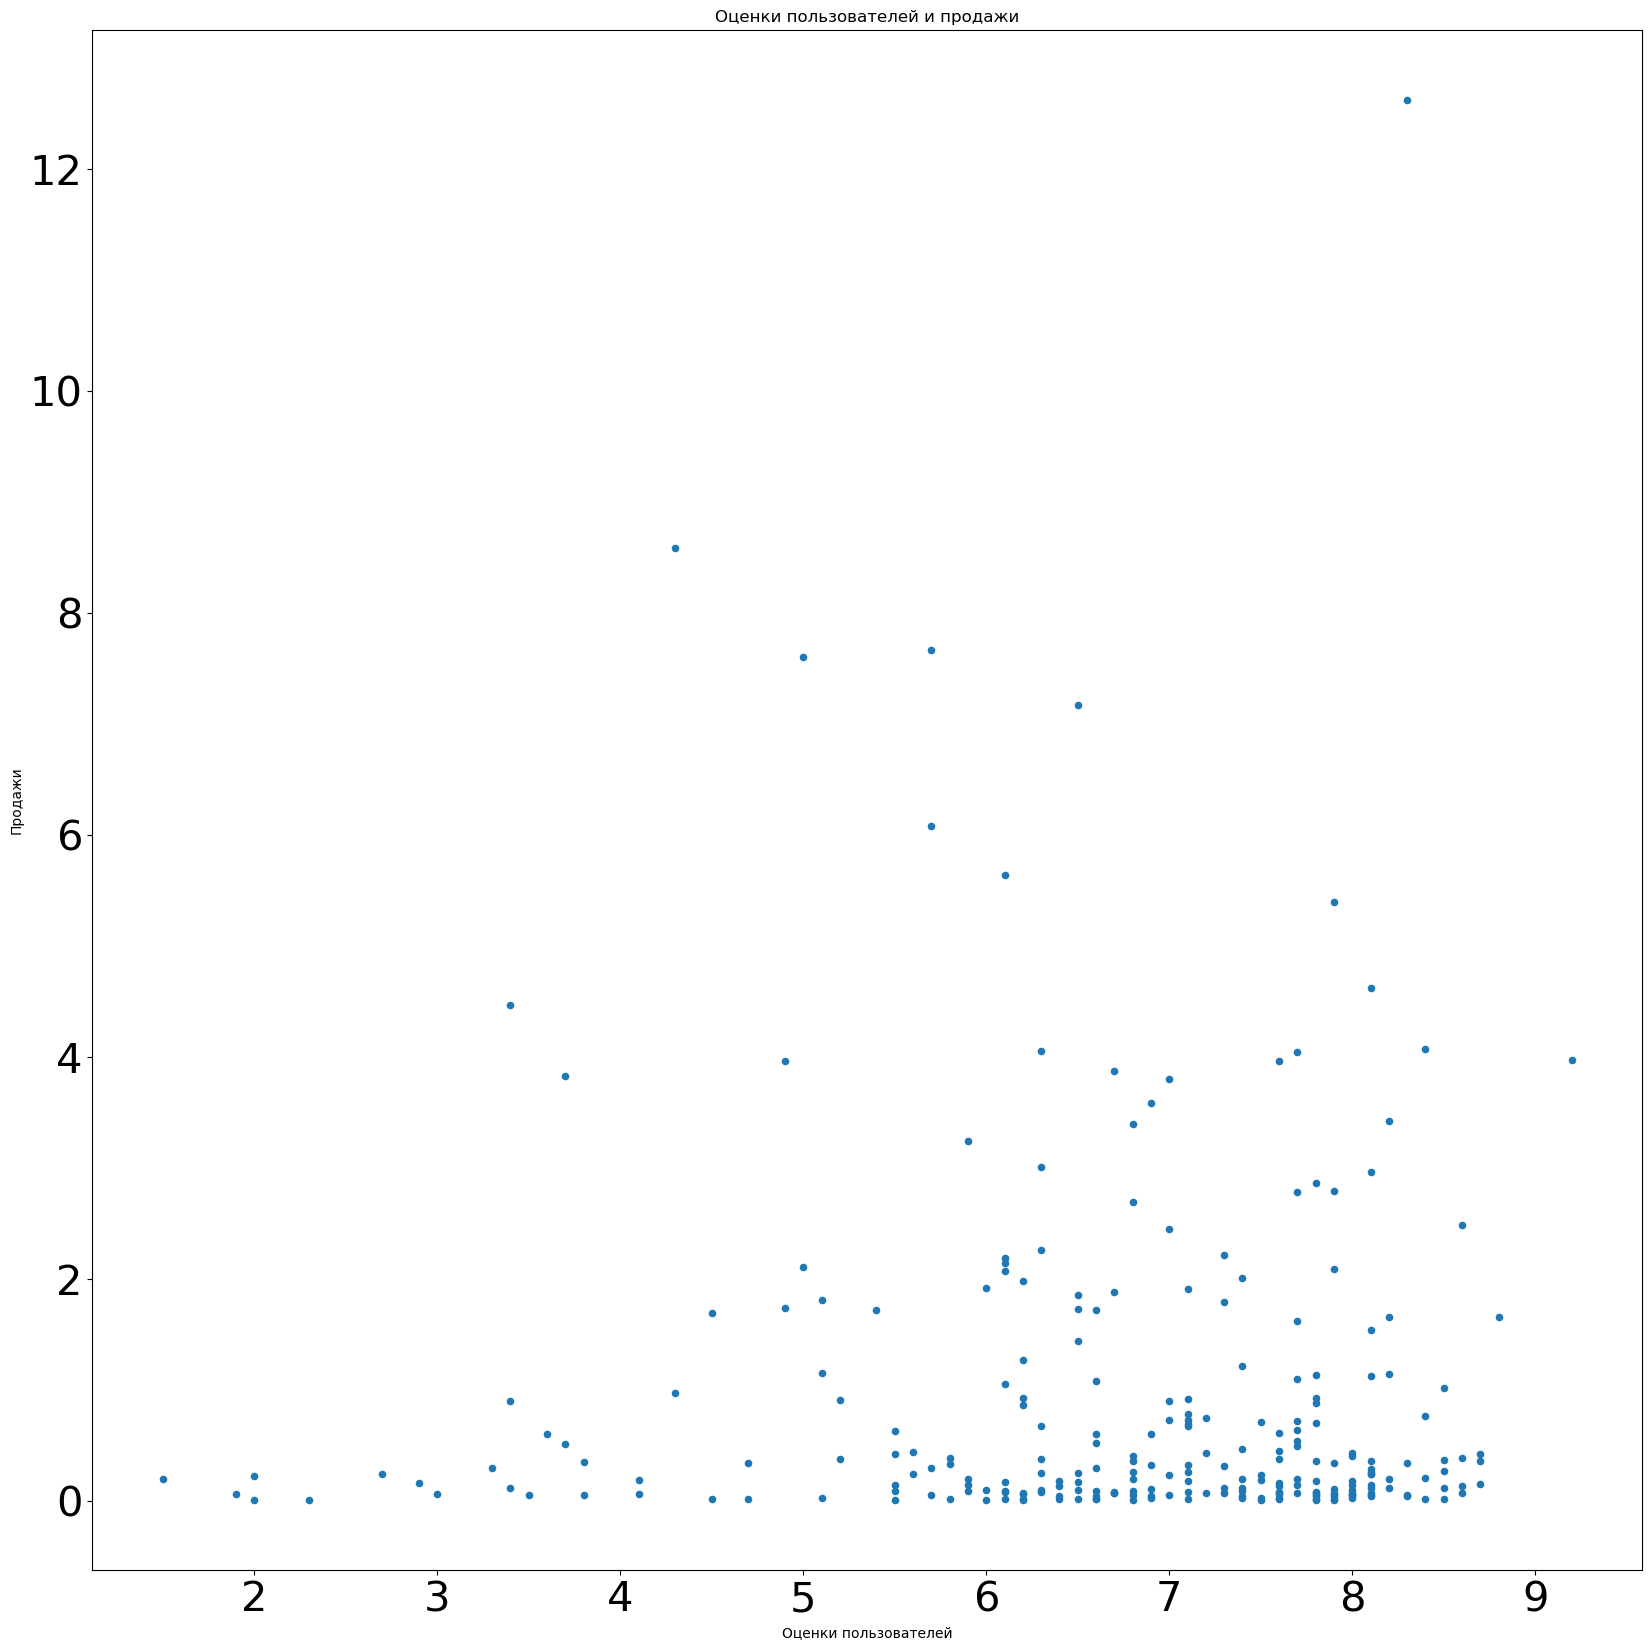

In [22]:
data_ps4.plot.scatter(x='user_score',
                     y='sales',
                     figsize=[20, 20],
                     title ='Оценки пользователей и продажи',
                     xlabel='Оценки пользователей',
                     ylabel='Продажи',
                     fontsize = 30);

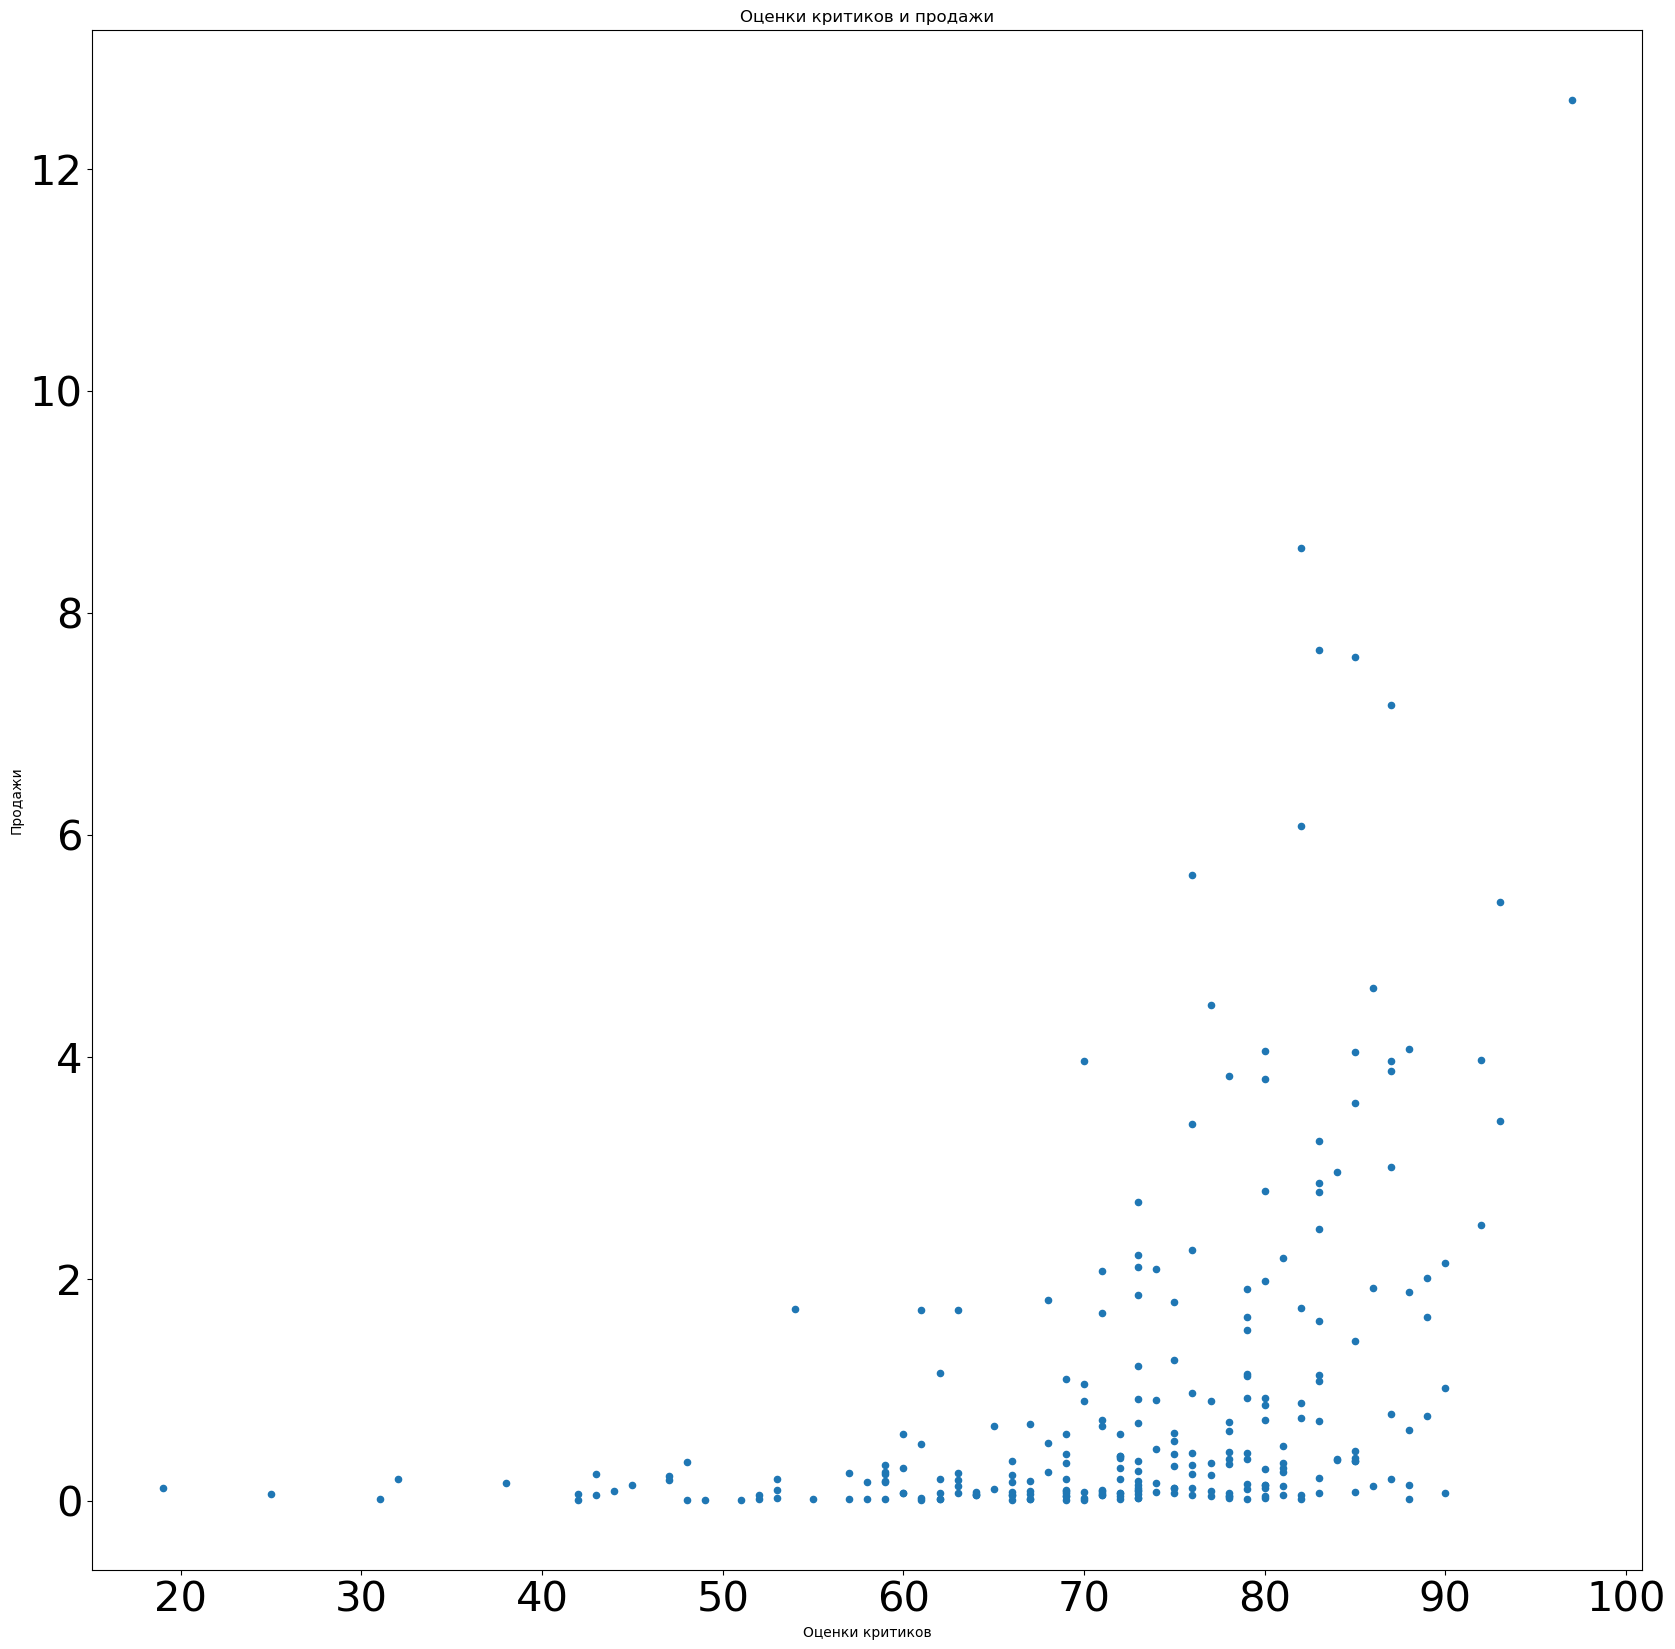

In [23]:
data_ps4.plot.scatter(x='critic_score', 
                     y='sales', 
                     figsize=[20, 20],
                     title ='Оценки критиков и продажи',
                     xlabel='Оценки критиков',
                     ylabel='Продажи',
                     fontsize = 30);

In [24]:
data_ps4.corr()

C:\Users\Владислав\AppData\Local\Temp\ipykernel_28972\2423265828.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_ps4.corr()


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sales
year_of_release,1.000000,-0.248961,-0.208306,-0.060993,-0.234796,-0.021142,0.152447,-0.235032
na_sales,-0.248961,1.000000,0.785362,0.472981,0.944259,0.415008,-0.020933,0.928160
eu_sales,-0.208306,0.785362,1.000000,0.464563,0.944698,0.346720,-0.048925,0.958157
jp_sales,-0.060993,0.472981,0.464563,1.000000,0.496467,0.322358,0.171332,0.527129
other_sales,-0.234796,0.944259,0.944698,0.496467,1.000000,0.409191,-0.035639,0.998051
critic_score,-0.021142,0.415008,0.346720,0.322358,0.409191,1.000000,0.557654,0.406568
user_score,0.152447,-0.020933,-0.048925,0.171332,-0.035639,0.557654,1.000000,-0.031957
sales,-0.235032,0.928160,0.958157,0.527129,0.998051,0.406568,-0.031957,1.000000


In [25]:
data_ps4['user_score'].corr(data_ps4['sales'])

-0.031957110204556424

In [26]:
data_ps4['critic_score'].corr(data_ps4['sales'])

0.40656790206178095

Можем сделать вывод, что оценки критиков прямопропорциональны продажам, чего нельзя сказать об оценках пользователей.

###### Соотнесите выводы с продажами игр на других платформах.

Возьмем 3DS и XOne.


In [27]:
data_3ds = good_data[good_data['platform'] == '3DS']
data_3ds.corr()

C:\Users\Владислав\AppData\Local\Temp\ipykernel_28972\483629950.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_3ds.corr()


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sales
year_of_release,1.000000,-0.075933,-0.115177,-0.063487,-0.083695,0.166254,0.240047,-0.090086
na_sales,-0.075933,1.000000,0.931893,0.641878,0.993708,0.369653,0.241036,0.938867
eu_sales,-0.115177,0.931893,1.000000,0.633982,0.958274,0.268851,0.114930,0.927821
jp_sales,-0.063487,0.641878,0.633982,1.000000,0.645306,0.301810,0.259370,0.854173
other_sales,-0.083695,0.993708,0.958274,0.645306,1.000000,0.354365,0.209418,0.945649
critic_score,0.166254,0.369653,0.268851,0.301810,0.354365,1.000000,0.769536,0.357057
user_score,0.240047,0.241036,0.114930,0.259370,0.209418,0.769536,1.000000,0.241504
sales,-0.090086,0.938867,0.927821,0.854173,0.945649,0.357057,0.241504,1.000000


In [28]:
data_xone = good_data[good_data['platform'] == 'XOne']
data_xone.corr()

C:\Users\Владислав\AppData\Local\Temp\ipykernel_28972\263071039.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_xone.corr()


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sales
year_of_release,1.000000,-0.242667,-0.194925,-0.127050,-0.243414,0.063712,0.079481,-0.239183
na_sales,-0.242667,1.000000,0.765367,0.425725,0.988088,0.388636,-0.069318,0.970433
eu_sales,-0.194925,0.765367,1.000000,0.421071,0.852986,0.379162,-0.055911,0.898045
jp_sales,-0.127050,0.425725,0.421071,1.000000,0.441717,0.202954,0.069591,0.452701
other_sales,-0.243414,0.988088,0.852986,0.441717,1.000000,0.411825,-0.069645,0.995238
critic_score,0.063712,0.388636,0.379162,0.202954,0.411825,1.000000,0.472462,0.416998
user_score,0.079481,-0.069318,-0.055911,0.069591,-0.069645,0.472462,1.000000,-0.068925
sales,-0.239183,0.970433,0.898045,0.452701,0.995238,0.416998,-0.068925,1.000000


Для 3DS значения корреляций для оценок пользователей и критиков: 0.22 и 0.34. Для XOne: -0.07 и 0.41. 

Для этих плафторм корреляция оценок критиков подтверждается. Но для 3DS оенки пользователей имеют небольшую прямопропорциональную зависимость с продажам. Об XOne и PS4 такого сказать нельзя.

###### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

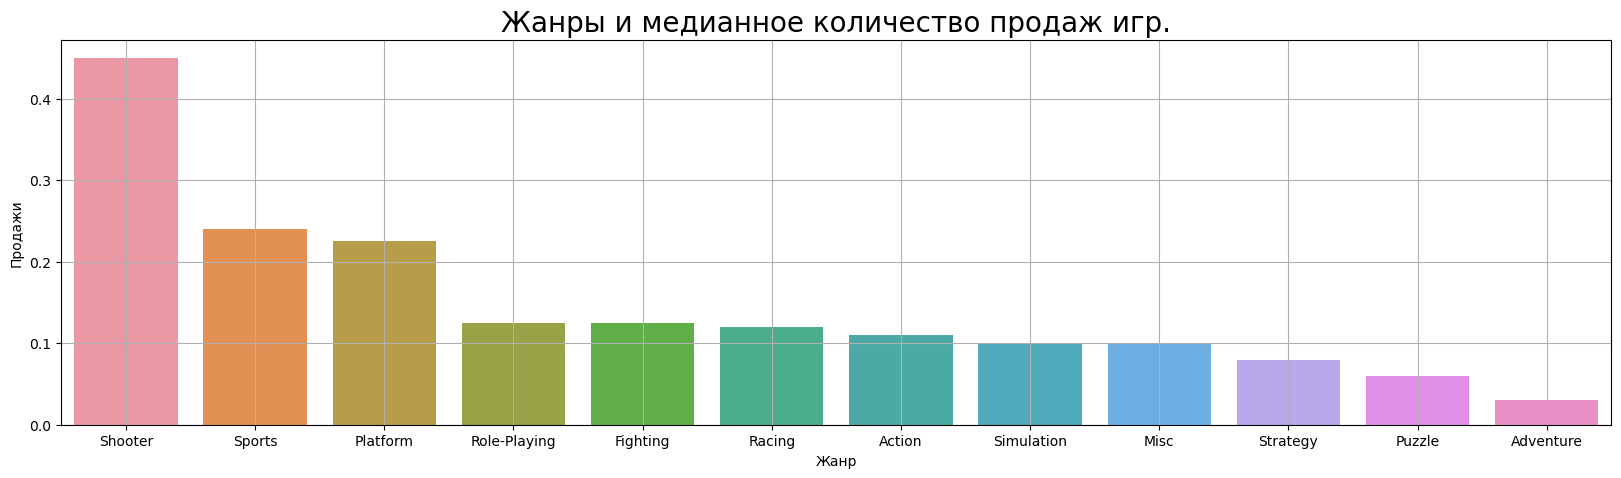

In [29]:
all_genre_and_sales = good_data.pivot_table(index='genre',values='sales',aggfunc='median').sort_values(by='sales', ascending=False).reset_index()

plt.figure(figsize=(20, 5))
plt.title('Жанры и медианное количество продаж игр.', fontsize=20)
sns.barplot(x='genre', y='sales', data=all_genre_and_sales)
plt.ylabel('Продажи')
plt.xlabel('Жанр')
plt.grid(True);

Самый популярный жанр - "shooter", у него больше всего продаж, а меньше всего у "adventure", этот жанр менее популярен.

Наибольшую популярность имеют жанры: "shooter", "sports", "platform", "role-playing". У них наибольшее количество продаж с отрывом от остальных.

##### Составьте портрет пользователя каждого региона

###### Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Посмотрим на платформы:

In [30]:
(
    good_data.groupby('platform')['na_sales']
                                          .sum()
                                          .sort_values(ascending = False)
                                          .head(5)
)

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64

In [31]:
(
    good_data.groupby('platform')['eu_sales']
                                          .sum()
                                          .sort_values(ascending = False)
                                          .head(5)
)

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64

In [32]:
(
    good_data.groupby('platform')['jp_sales']
                                          .sum()
                                          .sort_values(ascending = False)
                                          .head(5)
)

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64

Для Северной Америки самые популярные платформы: PS4, XOne, X360, 3DS, PS3. Для Европы: PS4, XOne, PS3, PC, 3DS. Для Японии: 3DS, PS4, PSV, PS3, WiiU.

Посмотрим на жанры:

In [33]:
(
    good_data.groupby('genre')['na_sales']
                                          .sum()
                                          .sort_values(ascending = False)
                                          .head(5)
)

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

In [34]:
(
    good_data.groupby('genre')['eu_sales']
                                          .sum()
                                          .sort_values(ascending = False)
                                          .head(5)
)

genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

In [35]:
(
    good_data.groupby('genre')['jp_sales']
                                          .sum()
                                          .sort_values(ascending = False)
                                          .head(5)
)

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64

Для Северной Америки самые популярные жанры: Shooter, Action, Sports, Role-Playing, Misc. Для Европы: Action, Shooter, Sports, Role-Playing, Racing. Для Японии: Role-Playing, Action, Fighting, Misc, Shooter.

###### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [36]:
ESRB = good_data.pivot_table(index = 'rating', values = ['eu_sales','jp_sales','na_sales'], aggfunc = 'sum')
ESRB

,eu_sales,jp_sales,na_sales
rating,,,
E,83.36,15.14,79.05
E10+,42.69,5.89,54.24
M,145.32,14.11,165.21
T,41.95,20.59,49.79
unknown,78.91,85.05,89.42


Да, рейтинг влияет на продажи в отдельных регионах. Так, например, игры с рейтингом EC продавались в основном только в Северной Америке

##### Проверьте гипотезы
- Средние пользовательские рейтинги платформ XOne и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [37]:
XOne = good_data[(good_data['platform'] == 'XOne') &  (good_data['user_score'] > 0)]['user_score']
PC = good_data[(good_data['platform'] == 'PC') &  (good_data['user_score'] > 0)]['user_score']
print('Средний пользовательский рейтинг платформы XOne:', XOne.mean())
print('Средний пользовательский рейтинг платформы PC', PC.mean())

Средний пользовательский рейтинг платформы XOne: 6.521428571428572
Средний пользовательский рейтинг платформы PC 6.2696774193548395


- H_0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- H_1: Средние пользовательские рейтинги платформ Xbox One и PC разные.

In [38]:
alpha = .05

results = st.ttest_ind(XOne, PC)
print("Значение p-value = ", results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Значение p-value =  0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Гипотеза не подвердилась, средние пользовательские рейтинги платформ XOne и PC разные.

In [39]:
Action = good_data[(good_data['genre'] == 'Action') &  (good_data['user_score'] > 0)]['user_score']
Sports = good_data[(good_data['genre'] == 'Sports') &  (good_data['user_score'] > 0)]['user_score']
print('Средний пользовательский рейтинг жанра Action:', Action.mean())
print('Средний пользовательский рейтинг жанра Sports', Sports.mean())

Средний пользовательский рейтинг жанра Action: 6.837532133676092
Средний пользовательский рейтинг жанра Sports 5.238124999999999


- H_0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
- H_1: Средние пользовательские рейтинги жанров Action и Sports разные.

In [40]:
alpha = .05

results = st.ttest_ind(Action, Sports)
print("Значение p-value = ", results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Значение p-value =  1.0517832389140023e-27
Отвергаем нулевую гипотезу


Гипотеза подтвердилась, средние пользовательские рейтинги жанров Action и Sports одинаковые.

##### Общий вывод:

Критерии, определяющие успешность игры:
- Рейтинг критиков
- Жанр
- Платформа
- Рейтинг ассоциации

Для Европы:
- Самые популярные платформы: PS4, XOne, PS3, PC, 3DS.
- Самые популярные жанры: Action, Shooter, Sports, Role-Playing, Racing.
- Категории ассоциации: E, M, unknown.

Для Северной Америки:
- Самые популярные платформы: PS4, XOne, X360, 3DS, PS3.
- Самые популярные жанры:  Shooter, Action, Sports, Role-Playing, Misc.
- Категории ассоциации: M, unknown, E.

Для Японии:
- Самые популярные платформы: 3DS, PS4, PSV, PS3, WiiU.
- Самые популярные жанры: Role-Playing, Action, Fighting, Misc, Shooter.
- Категории ассоциации: unknown.

*** Рейтинги, жанры, платформы указаны в порядке убывания